In [4]:
#Importación de datos
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandasql as ps

cleaned_air=pandas.read_csv("cleaned_air.csv")
cleaned_air

,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Landing Aircraft Type,Aircraft Body Type,Aircraft Manufacturer,Aircraft Model,Landing Count,Total Landed Weight
0,SkyWest Airlines,OO,United Airlines,UA,International,Canada,Passenger,Regional Jet,Bombardier,CRJ2,30,1410000
1,Air Canada,AC,Air Canada,AC,International,Canada,Passenger,Narrow Body,Airbus,A320,125,17787978
2,Japan Airlines,JL,Japan Airlines,JL,International,Asia,Passenger,Wide Body,Boeing,B773,30,16620000
3,"COPA Airlines, Inc.",CM,"COPA Airlines, Inc.",CM,International,Central America,Passenger,Narrow Body,Boeing,B739,3,491700
4,Hong Kong Airlines Limited,HX,Hong Kong Airlines Limited,HX,International,Asia,Passenger,Wide Body,Airbus,A359,16,7301712
...,...,...,...,...,...,...,...,...,...,...,...,...
22040,SkyWest Airlines,OO,Delta Air Lines,DL,Domestic,US,Passenger,Regional Jet,Bombardier,CRJ,155,7285000
22041,SkyWest Airlines,OO,United Airlines - Pre 07/01/2013,UA,Domestic,US,Passenger,Regional Jet,Bombardier,CRJ,268,17956000
22042,SkyWest Airlines,OO,United Airlines - Pre 07/01/2013,UA,International,Canada,Passenger,Regional Jet,Bombardier,CRJ,62,4154000
22043,SkyWest Airlines,OO,United Airlines - Pre 07/01/2013,UA,Domestic,US,Passenger,Regional Jet,Bombardier,CRJ,1360,63920000


In [3]:
#Exploración de las 5 primeras filas
cleaned_air[:5]

,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Landing Aircraft Type,Aircraft Body Type,Aircraft Manufacturer,Aircraft Model,Landing Count,Total Landed Weight
0,SkyWest Airlines,OO,United Airlines,UA,International,Canada,Passenger,Regional Jet,Bombardier,CRJ2,30,1410000
1,Air Canada,AC,Air Canada,AC,International,Canada,Passenger,Narrow Body,Airbus,A320,125,17787978
2,Japan Airlines,JL,Japan Airlines,JL,International,Asia,Passenger,Wide Body,Boeing,B773,30,16620000
3,"COPA Airlines, Inc.",CM,"COPA Airlines, Inc.",CM,International,Central America,Passenger,Narrow Body,Boeing,B739,3,491700
4,Hong Kong Airlines Limited,HX,Hong Kong Airlines Limited,HX,International,Asia,Passenger,Wide Body,Airbus,A359,16,7301712


In [4]:
#Información de cleaned_air
cleaned_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22045 entries, 0 to 22044
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Operating Airline            22045 non-null  object
 1   Operating Airline IATA Code  22045 non-null  object
 2   Published Airline            22045 non-null  object
 3   Published Airline IATA Code  22045 non-null  object
 4   GEO Summary                  22045 non-null  object
 5   GEO Region                   22045 non-null  object
 6   Landing Aircraft Type        22045 non-null  object
 7   Aircraft Body Type           22045 non-null  object
 8   Aircraft Manufacturer        22045 non-null  object
 9   Aircraft Model               22045 non-null  object
 10  Landing Count                22045 non-null  int64 
 11  Total Landed Weight          22045 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 2.0+ MB


In [5]:
#Descripción de columnas cuyos datos son int64
cleaned_air.describe()

,Landing Count,Total Landed Weight
count,22045.000000,2.204500e+04
mean,113.392425,1.899138e+07
std,249.636873,3.033287e+07
min,1.000000,6.850000e+03
25%,14.000000,3.035292e+06
50%,31.000000,9.660000e+06
75%,83.000000,1.953000e+07
max,2245.000000,2.730420e+08


In [10]:
#Lista de aerolíneas operativas
ps.sqldf('SELECT "Operating Airline" from cleaned_air group by "Operating Airline"',globals())

,Operating Airline
0,ABC Aerolineas S.A. de C.V. dba Interjet
1,ABX Air
2,"ASTAR USA, LLC"
3,ATA Airlines
4,Aer Lingus
...,...
102,WOW Air
103,WestJet Airlines
104,World Airways
105,XL Airways France


In [23]:
#Asegurar que la cantidad de códigos IATA por cada aerolínea operativa sea únicamente 1
ps.sqldf('SELECT "Operating Airline",count(DISTINCT"Operating Airline IATA Code") as "IATA Code Count" from cleaned_air group by "Operating Airline" ORDER BY "IATA Code Count" DESC',globals())

,Operating Airline,IATA Code Count
0,BelAir Airlines,2
1,Xtra Airways,1
2,XL Airways France,1
3,World Airways,1
4,WestJet Airlines,1
...,...,...
102,Aer Lingus,1
103,ATA Airlines,1
104,"ASTAR USA, LLC",1
105,ABX Air,1


In [21]:
#Investigar sobre la variedad de códigos IATA de BelAir Airlines
ps.sqldf('SELECT * from cleaned_air WHERE "Operating Airline"=="BelAir Airlines" AND "Operating Airline IATA Code"=="4T"',globals())

,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Landing Aircraft Type,Aircraft Body Type,Aircraft Manufacturer,Aircraft Model,Landing Count,Total Landed Weight
0,BelAir Airlines,4T,BelAir Airlines,4T,International,Europe,Passenger,Wide Body,Boeing,767,1,350000
1,BelAir Airlines,4T,BelAir Airlines,4T,International,Europe,Passenger,Wide Body,Boeing,767,5,1750000
2,BelAir Airlines,4T,BelAir Airlines,4T,International,Europe,Passenger,Wide Body,Boeing,767,4,1400000


In [22]:
ps.sqldf('SELECT * from cleaned_air WHERE "Operating Airline"=="BelAir Airlines" AND "Operating Airline IATA Code"=="BBB"',globals())

,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Landing Aircraft Type,Aircraft Body Type,Aircraft Manufacturer,Aircraft Model,Landing Count,Total Landed Weight
0,BelAir Airlines,BBB,BelAir Airlines,BBB,International,Europe,Passenger,Wide Body,Airbus,A330,1,400400
1,BelAir Airlines,BBB,BelAir Airlines,BBB,International,Europe,Passenger,Wide Body,Boeing,767,2,638656
2,BelAir Airlines,BBB,BelAir Airlines,BBB,International,Europe,Passenger,Wide Body,Boeing,767,4,1277312
3,BelAir Airlines,BBB,BelAir Airlines,BBB,International,Europe,Passenger,Wide Body,Boeing,767,5,1596640
4,BelAir Airlines,BBB,BelAir Airlines,BBB,International,Europe,Passenger,Wide Body,Boeing,767,1,350000
5,BelAir Airlines,BBB,BelAir Airlines,BBB,International,Europe,Passenger,Wide Body,Boeing,767,2,700000
6,BelAir Airlines,BBB,BelAir Airlines,BBB,International,Europe,Passenger,Wide Body,Boeing,767,4,1400000
7,BelAir Airlines,BBB,BelAir Airlines,BBB,International,Europe,Passenger,Wide Body,Boeing,767,4,1400000


In [13]:
#Asegurar que ninguno de los códigos de BelAir Airlines se comparta con otras aerolíneas 
ps.sqldf('SELECT "Operating Airline","Operating Airline IATA Code" from cleaned_air WHERE "Operating Airline IATA Code"=="4T" OR  "Operating Airline IATA Code"=="BBB" GROUP BY "Operating Airline IATA Code","Operating Airline"',globals())

,Operating Airline,Operating Airline IATA Code
0,BelAir Airlines,4T
1,BelAir Airlines,BBB


In [27]:
#Asegurar que la cantidad de aerolínea operativa por códigos IATA sea únicamente 1
ps.sqldf('SELECT "Operating Airline IATA Code",count(DISTINCT"Operating Airline") as "Operating Airline Count" from cleaned_air group by "Operating Airline IATA Code" HAVING "Operating Airline Count">1',globals())

,Operating Airline IATA Code,Operating Airline Count
0,FI,2
1,QK,2
2,UA,12


In [31]:
#Investigar casos donde existe más de 1 aerolínea operativa por código IATA
ps.sqldf('SELECT  "Operating Airline", "Operating Airline IATA Code" FROM  cleaned_air WHERE "Operating Airline IATA Code"=="FI" OR "Operating Airline IATA Code"=="QK" OR "Operating Airline IATA Code"=="UA" GROUP BY  "Operating Airline"',globals())

,Operating Airline,Operating Airline IATA Code
0,"ASTAR USA, LLC",UA
1,Air Canada Jazz,QK
2,"Air Transport International, LLC.",UA
3,Boeing Company,UA
4,E.A.G.L.E.,UA
5,Focus Air,UA
6,Icelandair,FI
7,Icelandair EHF,FI
8,Jazz Aviation,QK
9,Pacific Aviation,UA


In [24]:
#Asegurar que la cantidad de códigos IATA por cada aerolínea publicada sea únicamente 1
ps.sqldf('SELECT "Published Airline",count(DISTINCT"Published Airline IATA Code") as IATACodeCount from cleaned_air group by "Published Airline" order by IATACodeCount desc LIMIT 5',globals())

,Published Airline,IATACodeCount
0,BelAir Airlines,2
1,Xtra Airways,1
2,XL Airways France,1
3,World Airways,1
4,WestJet Airlines,1


In [25]:
#Investigar sobre la variedad de códigos IATA de BelAir Airlines
ps.sqldf('SELECT * from cleaned_air WHERE "Published Airline"=="BelAir Airlines" AND "Published Airline IATA Code"=="4T"',globals())

,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Landing Aircraft Type,Aircraft Body Type,Aircraft Manufacturer,Aircraft Model,Landing Count,Total Landed Weight
0,BelAir Airlines,4T,BelAir Airlines,4T,International,Europe,Passenger,Wide Body,Boeing,767,1,350000
1,BelAir Airlines,4T,BelAir Airlines,4T,International,Europe,Passenger,Wide Body,Boeing,767,5,1750000
2,BelAir Airlines,4T,BelAir Airlines,4T,International,Europe,Passenger,Wide Body,Boeing,767,4,1400000


In [26]:
ps.sqldf('SELECT * from cleaned_air WHERE "Published Airline"=="BelAir Airlines" AND "Published Airline IATA Code"=="BBB"',globals())

,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Landing Aircraft Type,Aircraft Body Type,Aircraft Manufacturer,Aircraft Model,Landing Count,Total Landed Weight
0,BelAir Airlines,BBB,BelAir Airlines,BBB,International,Europe,Passenger,Wide Body,Airbus,A330,1,400400
1,BelAir Airlines,BBB,BelAir Airlines,BBB,International,Europe,Passenger,Wide Body,Boeing,767,2,638656
2,BelAir Airlines,BBB,BelAir Airlines,BBB,International,Europe,Passenger,Wide Body,Boeing,767,4,1277312
3,BelAir Airlines,BBB,BelAir Airlines,BBB,International,Europe,Passenger,Wide Body,Boeing,767,5,1596640
4,BelAir Airlines,BBB,BelAir Airlines,BBB,International,Europe,Passenger,Wide Body,Boeing,767,1,350000
5,BelAir Airlines,BBB,BelAir Airlines,BBB,International,Europe,Passenger,Wide Body,Boeing,767,2,700000
6,BelAir Airlines,BBB,BelAir Airlines,BBB,International,Europe,Passenger,Wide Body,Boeing,767,4,1400000
7,BelAir Airlines,BBB,BelAir Airlines,BBB,International,Europe,Passenger,Wide Body,Boeing,767,4,1400000


In [28]:
#Asegurar que la cantidad de aerolínea publicada por códigos IATA sea únicamente 1
ps.sqldf('SELECT "Published Airline IATA Code",count(DISTINCT"Published Airline") as "Published Airline Count" from cleaned_air group by "Published Airline IATA Code" HAVING "Published Airline Count">1',globals())

,Published Airline IATA Code,Published Airline Count
0,FI,2
1,UA,12


In [33]:
#Investigar casos donde más de 1 aerolínea publicada tiene el mismo código IATA
ps.sqldf('SELECT  "Published Airline", "Published Airline IATA Code" FROM  cleaned_air WHERE "Published Airline IATA Code"=="FI" OR "Published Airline IATA Code"=="QK" OR "Published Airline IATA Code"=="UA" GROUP BY  "Published Airline"',globals())

,Published Airline,Published Airline IATA Code
0,"Air Transport International, LLC.",UA
1,Boeing Company,UA
2,DHL Express (USA),UA
3,E.A.G.L.E.,UA
4,Focus Air,UA
5,Icelandair,FI
6,Icelandair EHF,FI
7,Pacific Aviation,UA
8,Servisair,UA
9,Swissport USA,UA


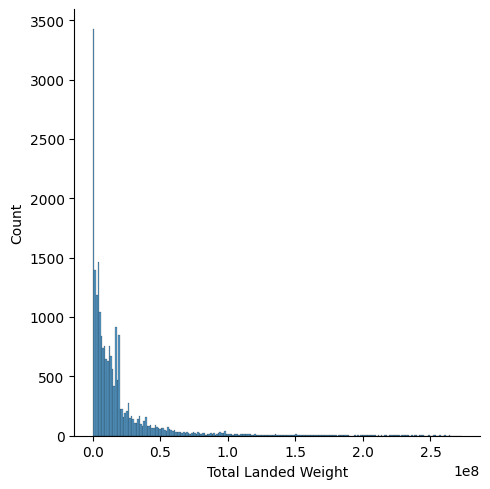

In [6]:
#Distribución de cantidad de aerolíneas por peso total desembarcado
sns.displot(cleaned_air['Total Landed Weight'])

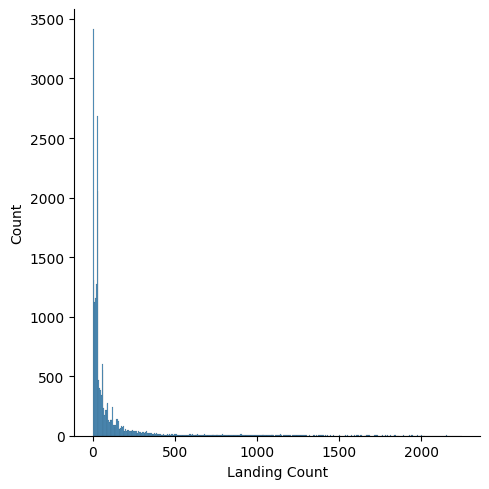

In [34]:
#Distribución de recuento de aterrizajes 
sns.displot(cleaned_air['Landing Count'])